In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the data.
df = pd.read_csv("games.csv")
# Print the names of the columns in games.
print(df.columns)
print(df.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [3]:
df.tail(10)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81302,184399,boardgame,Micropolis,2014.0,2.0,4.0,60.0,30.0,60.0,12.0,0,0.0,0.0,0,0,0,1,0,0,0.0
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,60.0,0.0,18.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81304,184424,boardgame,Mega Civilization,2015.0,5.0,18.0,720.0,360.0,720.0,12.0,0,0.0,0.0,0,0,0,3,0,0,0.0
81305,184439,boardgame,Succession!,2016.0,1.0,6.0,10.0,5.0,10.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81306,184440,boardgame,Stick and Stones,2015.0,2.0,2.0,120.0,45.0,120.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


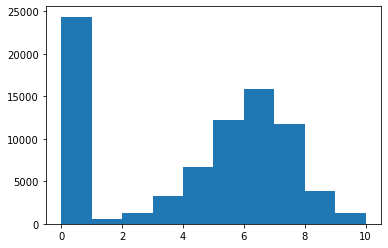

In [4]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(df["average_rating"])

# Show the plot.
plt.show()

In [5]:
# It seems that there are large no of game which are not even rated

In [6]:
# df[df["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(df[df["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [7]:
# Print the first row of all the games with scores greater than 0.
print(df[df["average_rating"] > 0].iloc[0])


id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [8]:
# Remove any rows without user reviews.
df = df[df["users_rated"] > 0]
# Remove any rows with missing values.
df = df.dropna(axis=0)

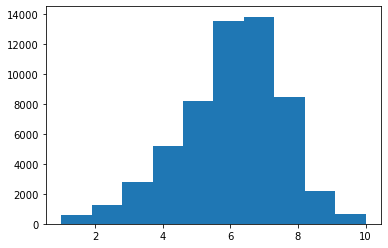

In [9]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(df["average_rating"])

# Show the plot.
plt.show()

<AxesSubplot:>

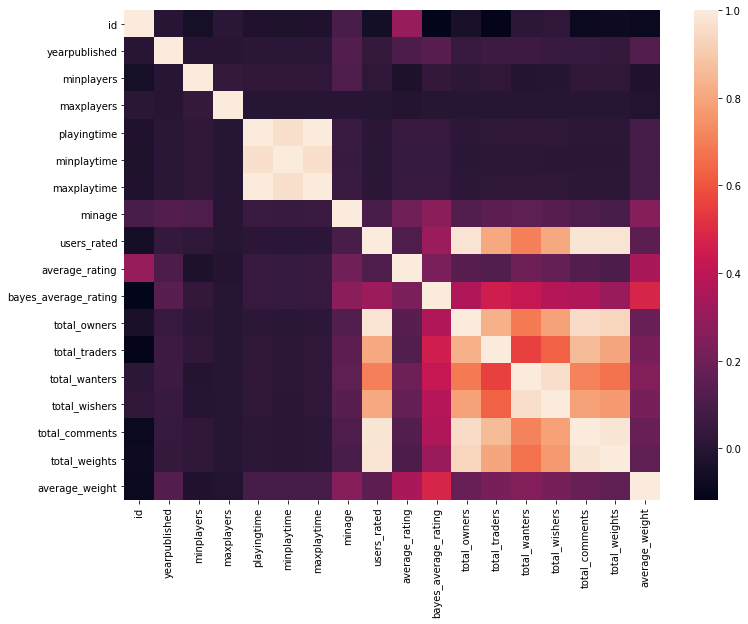

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr())

In [11]:
# Get all the columns from the dataframe.
Z = df.columns

In [12]:
Z

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [13]:
# Filter the columns to remove ones we don't want.
X = df[['yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight']]

In [14]:
X

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81260,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,16,0,0,1,2,1,1.0000
81261,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,19,0,0,1,2,1,1.0000
81263,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,22,0,0,0,2,1,1.0000
81278,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,0,0,0,0,1,0,0.0000


In [15]:
# Store the variable we'll be predicting on.
y = df[["average_rating"]]

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [17]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Generate our predictions for the test set.
y_pred = model.predict(X_test)

In [19]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error
# Compute error between our test predictions and the actual values.
mean_squared_error(y_pred, y_test)

2.0889041588961903

# Random Forest Model

In [20]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(X_train, y_train)
# Make predictions.
y_pred = model.predict(X_test)
# Compute the error.
mean_squared_error(y_pred, y_test)

<ipython-input-20-d483c1492c04>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


1.4485932641133243